# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32)
X_test_s = ss.transform(X_test).astype(np.int32)

In [6]:
y_train_c = to_categorical(y_train).astype(np.int32)
y_test_c = to_categorical(y_test).astype(np.int32)

In [7]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


By the way, here is a helpful blog post that goes carefully through a list of similarly-named different activation functions and loss functions: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [19]:
history = model.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 0s 63us/step - loss: 2.0473 - acc: 0.2654 - val_loss: 1.7509 - val_acc: 0.4068
Epoch 2/30
4872/4872 [==============================] - 0s 23us/step - loss: 1.5729 - acc: 0.4399 - val_loss: 1.4330 - val_acc: 0.4658
Epoch 3/30
4872/4872 [==============================] - 0s 23us/step - loss: 1.3473 - acc: 0.4745 - val_loss: 1.2998 - val_acc: 0.4745
Epoch 4/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.2555 - acc: 0.4797 - val_loss: 1.2452 - val_acc: 0.4757
Epoch 5/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.2108 - acc: 0.4897 - val_loss: 1.2178 - val_acc: 0.4868
Epoch 6/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.1844 - acc: 0.4910 - val_loss: 1.1998 - val_acc: 0.4886
Epoch 7/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.1668 - acc: 0.4994 - val_loss: 1.1898 - val_acc: 0.4868
Epoch 8

In [20]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.38455003,  0.00995534, -0.0653325 ,  0.2484422 , -0.15754016,
         0.20059112, -0.4818639 ,  0.10367136, -0.28214255,  0.0137123 ,
         0.27859712, -0.05579067],
       [ 0.22311403, -0.59849054, -0.47372523, -0.1851462 ,  0.49502864,
        -0.07816668,  0.21446638,  0.06794906,  0.07655327, -0.09121287,
        -0.10126437,  0.25386196],
       [-0.02981859, -0.34815097, -0.11350621,  0.34768423, -0.6797364 ,
        -0.3231568 , -0.15445328, -0.14886075,  0.11153347,  0.04659726,
        -0.2456757 ,  0.6887898 ],
       [ 0.2811405 ,  0.56747115,  0.07706505, -0.08164346, -0.6178518 ,
         0.2633699 ,  0.22081675,  0.28995407, -0.10584678, -0.42155898,
        -0.76468533, -0.40281475],
       [ 0.23036478, -0.1571165 ,  0.1879805 , -0.18201335,  0.21609412,
         0.26546457,  0.5435256 ,  0.29258278,  0.24909146, -0.19704999,
         0.08575552, -0.01719054],
       [-0.26582104,  0.04322278,  0.04006689,  0.15174158, -0.2901427 ,
        -0.7161106 , 

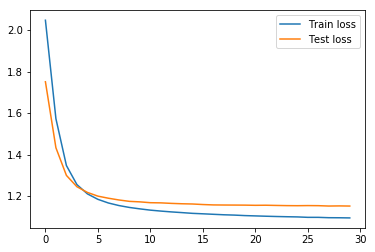

In [21]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

## Adding Regularization

Here's a helpful review article on regularization techniques: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [22]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(10, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 85us/step - loss: 2.0763 - acc: 0.3510 - val_loss: 1.8448 - val_acc: 0.4135
Epoch 2/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.6879 - acc: 0.4462 - val_loss: 1.5909 - val_acc: 0.4652
Epoch 3/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.5013 - acc: 0.4904 - val_loss: 1.4630 - val_acc: 0.4818
Epoch 4/42
4872/4872 [==============================] - 0s 26us/step - loss: 1.4037 - acc: 0.4951 - val_loss: 1.3935 - val_acc: 0.4880
Epoch 5/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.3485 - acc: 0.4936 - val_loss: 1.3522 - val_acc: 0.4917
Epoch 6/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.3149 - acc: 0.4885 - val_loss: 1.3240 - val_acc: 0.4892
Epoch 7/42
4872/4872 [==============================] - 0s 33us/step - loss: 1.2915 - acc: 0.4940 - val_loss: 1.3056 - val_acc: 0.4954
Epoch 8

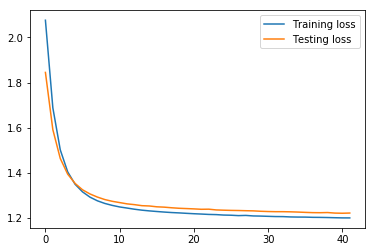

In [23]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

In [24]:
model_r.predict(X_test_s[:5]).round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.05, 0.34, 0.43, 0.13, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.03, 0.33, 0.48, 0.12, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.06, 0.67, 0.22, 0.03, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.03, 0.3 , 0.49, 0.13, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.06, 0.62, 0.27, 0.04, 0.01, 0.  ]],
      dtype=float32)

In [25]:
y_test_c[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int32)

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [26]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(10, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                       epochs=42, batch_size=None)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 94us/step - loss: 1.9179 - acc: 0.3606 - val_loss: 1.6457 - val_acc: 0.4185
Epoch 2/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.5391 - acc: 0.4464 - val_loss: 1.4096 - val_acc: 0.4535
Epoch 3/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.3805 - acc: 0.4624 - val_loss: 1.3050 - val_acc: 0.4763
Epoch 4/42
4872/4872 [==============================] - 0s 28us/step - loss: 1.3072 - acc: 0.4739 - val_loss: 1.2525 - val_acc: 0.4880
Epoch 5/42
4872/4872 [==============================] - 0s 28us/step - loss: 1.2574 - acc: 0.4774 - val_loss: 1.2237 - val_acc: 0.4911
Epoch 6/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.2398 - acc: 0.4756 - val_loss: 1.2049 - val_acc: 0.4954
Epoch 7/42
4872/4872 [=====

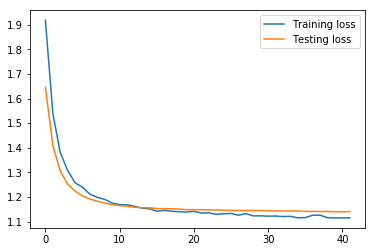

In [27]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [28]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5090311986863711, 0.497230768937331)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(10, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                         epochs=20, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/20
4872/4872 [==============================] - 0s 100us/step - loss: 2.0674 - acc: 0.2490 - val_loss: 1.7831 - val_acc: 0.3385
Epoch 2/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.5897 - acc: 0.3779 - val_loss: 1.4484 - val_acc: 0.4302
Epoch 3/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.3537 - acc: 0.4639 - val_loss: 1.3007 - val_acc: 0.4751
Epoch 4/20
4872/4872 [==============================] - 0s 32us/step - loss: 1.2494 - acc: 0.4770 - val_loss: 1.2425 - val_acc: 0.4905
Epoch 5/20
4872/4872 [==============================] - 0s 28us/step - loss: 1.2033 - acc: 0.4893 - val_loss: 1.2134 - val_acc: 0.4868
Epoch 6/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.1767 - acc: 0.4975 - val_loss: 1.1961 - val_acc: 0.4954
Epoch 7/20
4872/4872 [==============================] - 0s 25us/step - loss: 1.1597 - acc: 0.5014 - val_loss: 1.1841 - val_acc: 0.4997
Epoch 

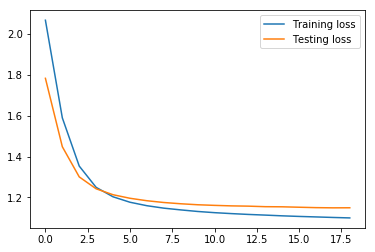

In [31]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();